In [2]:
%pip install pandas numpy seaborn matplotlib yfinance

Note: you may need to restart the kernel to use updated packages.


In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# Step 1: Fetch real stock data for Reliance Industries (RELIANCE.NS)
ticker = "RELIANCE.NS"
try:
    df = yf.download(ticker, start="2023-01-01", end="2025-07-31", progress=False)
    if df.empty:
        print("Error: No data fetched. Check internet connection or ticker symbol.")
        exit()
except Exception as e:
    print(f"Error fetching data: {e}")
    exit()

C:\Users\comp\AppData\Local\Temp\ipykernel_4392\818244321.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2023-01-01", end="2025-07-31", progress=False)


In [28]:
# Step 2: Clean the data
# Q1: Are there any missing values in the dataset?
print("Q1: Are there any missing values in the dataset?")
print("Missing Values:\n", df.isnull().sum())
# Remove any rows with missing values
df = df.dropna()
# Keep only necessary columns: Open, High, Low, Close, Volume
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
# Ensure dates are in datetime format
df.index = pd.to_datetime(df.index)

Q1: Are there any missing values in the dataset?
Missing Values:
 Price   Ticker     
Close   RELIANCE.NS    0
High    RELIANCE.NS    0
Low     RELIANCE.NS    0
Open    RELIANCE.NS    0
Volume  RELIANCE.NS    0
dtype: int64


In [29]:
# Step 3: Calculate simple metrics
# Daily change in price (Close - Open)
df['Price_Change'] = df['Close'] - df['Open']
# Daily return in percentage (how much the price changed compared to the previous day)
df['Daily_Return'] = df['Close'].pct_change() * 100
# 20-day moving average (average closing price over 20 days)
df['MA20'] = df['Close'].rolling(window=20).mean()
# 50-day moving average (average closing price over 50 days)
df['MA50'] = df['Close'].rolling(window=50).mean()
# Simple volatility: standard deviation of daily returns over 20 days
df['Volatility'] = df['Daily_Return'].rolling(window=20).std()

# Set plot style for clear visuals
sns.set(style='whitegrid')

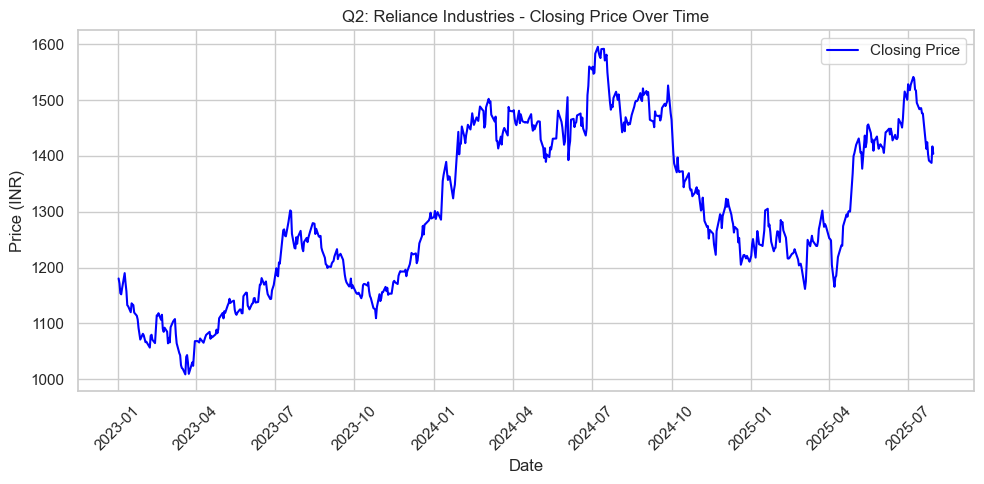

In [30]:
# Q2: How does the closing price change over time?
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'], label='Closing Price', color='blue')
plt.title('Q2: Reliance Industries - Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# plt.savefig('q2_closing_price.png')
plt.close()

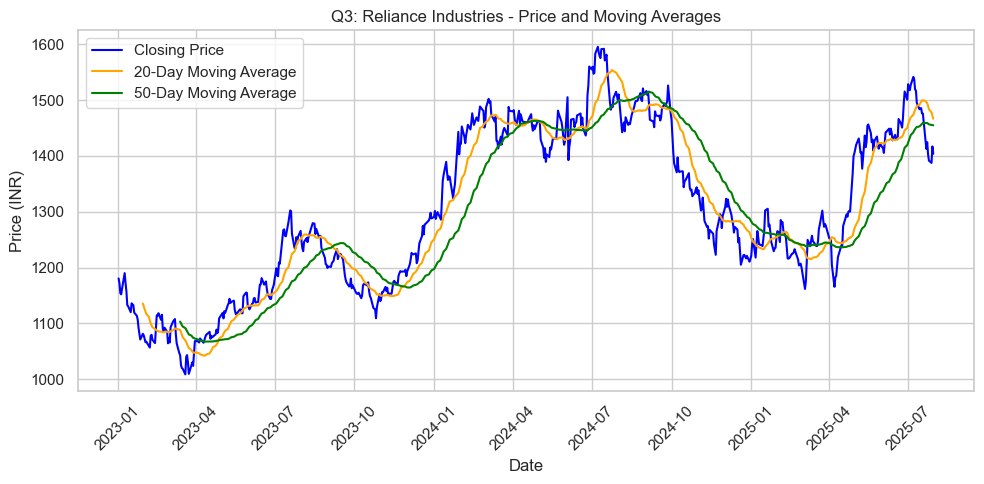

In [31]:
# Q3: How do the 20-day and 50-day moving averages compare?
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'], label='Closing Price', color='blue')
plt.plot(df.index, df['MA20'], label='20-Day Moving Average', color='orange')
plt.plot(df.index, df['MA50'], label='50-Day Moving Average', color='green')
plt.title('Q3: Reliance Industries - Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('q3_moving_averages.png')
plt.show()
plt.close()

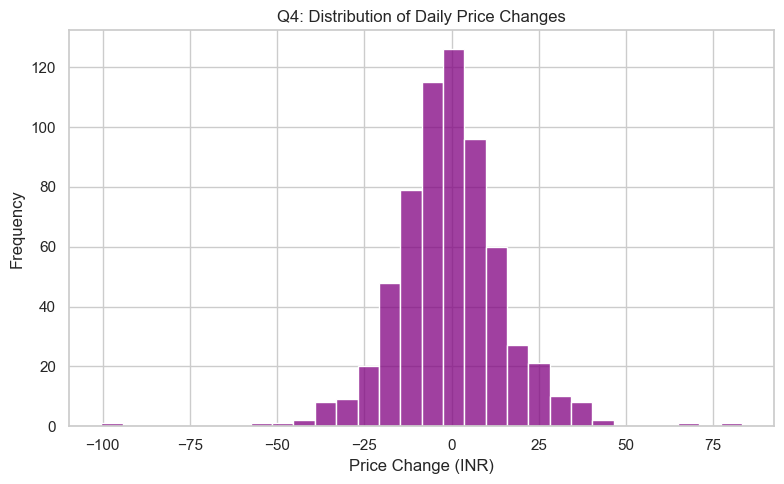

In [32]:
# Q4: What is the distribution of daily price changes?
plt.figure(figsize=(8, 5))
sns.histplot(df['Price_Change'].dropna(), bins=30, color='purple')
plt.title('Q4: Distribution of Daily Price Changes')
plt.xlabel('Price Change (INR)')
plt.ylabel('Frequency')
plt.tight_layout()
#plt.savefig('q4_price_change_dist.png')
plt.show()
plt.close()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# Step 1: Fetch real stock data for Reliance Industries (RELIANCE.NS)
ticker = "RELIANCE.NS"
try:
    df = yf.download(ticker, start="2023-01-01", end="2025-07-31", progress=False)
    if df.empty:
        print("Error: No data fetched. Check internet connection or ticker symbol.")
        exit()
except Exception as e:
    print(f"Error fetching data: {e}")
    exit()

# Step 2: Clean the data
# Q1: Are there any missing values in the dataset?
print("Q1: Are there any missing values in the dataset?")
print("Missing Values:\n", df.isnull().sum())
# Remove any rows with missing values
df = df.dropna()
# Keep only necessary columns: Open, High, Low, Close, Volume
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
# Ensure dates are in datetime format
df.index = pd.to_datetime(df.index)

# Step 3: Calculate simple metrics
# Daily change in price (Close - Open)
df['Price_Change'] = df['Close'] - df['Open']
# Daily return in percentage (how much the price changed compared to the previous day)
df['Daily_Return'] = df['Close'].pct_change() * 100
# 20-day moving average (average closing price over 20 days)
df['MA20'] = df['Close'].rolling(window=20).mean()
# 50-day moving average (average closing price over 50 days)
df['MA50'] = df['Close'].rolling(window=50).mean()
# Simple volatility: standard deviation of daily returns over 20 days
df['Volatility'] = df['Daily_Return'].rolling(window=20).std()

# Set plot style for clear visuals
sns.set(style='whitegrid')

# Q2: How does the closing price change over time?
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'], label='Closing Price', color='blue')
plt.title('Q2: Reliance Industries - Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('q2_closing_price.png')
plt.close()

# Q3: How do the 20-day and 50-day moving averages compare?
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'], label='Closing Price', color='blue')
plt.plot(df.index, df['MA20'], label='20-Day Moving Average', color='orange')
plt.plot(df.index, df['MA50'], label='50-Day Moving Average', color='green')
plt.title('Q3: Reliance Industries - Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('q3_moving_averages.png')
plt.close()

# Q4: What is the distribution of daily price changes?
plt.figure(figsize=(8, 5))
sns.histplot(df['Price_Change'].dropna(), bins=30, color='purple')
plt.title('Q4: Distribution of Daily Price Changes')
plt.xlabel('Price Change (INR)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('q4_price_change_dist.png')
plt.close()

# Q5: How does trading volume change over time?
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Volume'], color='gray')
plt.title('Q5: Reliance Industries - Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume (Shares)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('q5_volume.png')
plt.close()

# Q6: What is the average daily return?
avg_daily_return = df['Daily_Return'].mean()
print(f"\nQ6: Average Daily Return: {avg_daily_return:.2f}%")

# Q7: What is the highest closing price?

# Q8: What is the lowest closing price?
if not df.empty and isinstance(df.index, pd.DatetimeIndex):
    max_price = df['Close'].max()
    max_price_date = df['Close'].idxmax().strftime('%Y-%m-%d')
    print(f"\nQ7: Highest Closing Price: ₹{max_price:.2f} on {max_price_date}")

    min_price = df['Close'].min()
    min_price_date = df['Close'].idxmin().strftime('%Y-%m-%d')
    print(f"\nQ8: Lowest Closing Price: ₹{min_price:.2f} on {min_price_date}")
else:
    print("\nQ7/Q8: DataFrame is empty or index is not datetime.")

# Q9: How many days had a positive price change?
positive_days = len(df[df['Price_Change'] > 0])
print(f"\nQ9: Number of Days with Positive Price Change: {positive_days}")

# Q10: How many days had a negative price change?
negative_days = len(df[df['Price_Change'] < 0])
print(f"\nQ10: Number of Days with Negative Price Change: {negative_days}")

# Q11: What is the average trading volume?
avg_volume = df['Volume'].mean()
print(f"\nQ11: Average Trading Volume: {avg_volume:,.0f} shares")

# Q12: How volatile is the stock over time?
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Volatility'], color='red')
plt.title('Q12: Reliance Industries - 20-Day Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (Std Dev of Returns)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('q12_volatility.png')
plt.close()

# Q13: What is the correlation between price and volume?
correlation = df[['Close', 'Volume']].corr().iloc[0, 1]
print(f"\nQ13: Correlation between Closing Price and Volume: {correlation:.2f}")
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Close'], y=df['Volume'], color='teal')
plt.title('Q13: Price vs. Volume - Reliance Industries')
plt.xlabel('Closing Price (INR)')
plt.ylabel('Volume (Shares)')
plt.tight_layout()
plt.savefig('q13_price_volume.png')
plt.close()

# Q14: How does the stock perform each year?
df['Year'] = df.index.year
yearly_returns = df.groupby('Year')['Daily_Return'].mean()
plt.figure(figsize=(8, 5))
yearly_returns.plot(kind='bar', color='orange')
plt.title('Q14: Average Daily Returns by Year')
plt.xlabel('Year')
plt.ylabel('Average Daily Return (%)')
plt.tight_layout()
plt.savefig('q14_yearly_returns.png')
plt.close()
print("\nQ14: Average Daily Returns by Year:")
for year, ret in yearly_returns.items():
    print(f"Year {year}: {ret:.2f}%")

# Q15: What are some key facts about Reliance Industries?
print("\nQ15: Key Facts about Reliance Industries (as of July 2025):")
print("Market Cap: ₹18,77,765.90 Crore")
print("1-Year Stock Performance: -7.0%")
print("Q1 FY26 Net Profit: ₹26,994 Crore")
print("Q1 FY26 Revenue: ₹2,48,000 Crore")
print("Source: Web data and posts on X")

C:\Users\comp\AppData\Local\Temp\ipykernel_4392\3498006943.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2023-01-01", end="2025-07-31", progress=False)


Q1: Are there any missing values in the dataset?
Missing Values:
 Price   Ticker     
Close   RELIANCE.NS    0
High    RELIANCE.NS    0
Low     RELIANCE.NS    0
Open    RELIANCE.NS    0
Volume  RELIANCE.NS    0
dtype: int64

Q6: Average Daily Return: 0.04%


AttributeError: 'Series' object has no attribute 'strftime'